# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:30:28.252904: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:30:28.279959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:30:28.711614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "CHSH"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:30:29.699232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:30:29.721573: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395430.328961  204742 service.cc:145] XLA service 0x719e400039c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395430.328994  204742 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:30:30.341690: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:30:30.413320: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:49 1s/step - accuracy: 0.5938 - loss: 0.6951

100/150 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6533 - loss: 0.6356

I0000 00:00:1716395430.988150  204742 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6637 - loss: 0.6173 - val_accuracy: 0.8267 - val_loss: 0.4128


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.4477

144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8935 - loss: 0.3149

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8948 - loss: 0.3119 - val_accuracy: 0.9483 - val_loss: 0.1734


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0856

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9605 - loss: 0.1415

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9609 - loss: 0.1400 - val_accuracy: 0.9642 - val_loss: 0.1262


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1056

139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9734 - loss: 0.1047

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9736 - loss: 0.1043 - val_accuracy: 0.9700 - val_loss: 0.1076


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0313

142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9821 - loss: 0.0716

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9819 - loss: 0.0726 - val_accuracy: 0.9717 - val_loss: 0.1047


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0312

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9801 - loss: 0.0893

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9802 - loss: 0.0885 - val_accuracy: 0.9783 - val_loss: 0.0932


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0656

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9834 - loss: 0.0782

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9832 - loss: 0.0777 - val_accuracy: 0.9800 - val_loss: 0.0882


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0178

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9824 - loss: 0.0960

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9826 - loss: 0.0919 - val_accuracy: 0.9825 - val_loss: 0.0853


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0391

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9861 - loss: 0.0573

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9860 - loss: 0.0587 - val_accuracy: 0.9825 - val_loss: 0.0849


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1071

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9849 - loss: 0.0661

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9850 - loss: 0.0656 - val_accuracy: 0.9850 - val_loss: 0.0790


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0139

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9876 - loss: 0.0527

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9873 - loss: 0.0537 - val_accuracy: 0.9833 - val_loss: 0.0785


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0265

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9882 - loss: 0.0495

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9881 - loss: 0.0502 - val_accuracy: 0.9875 - val_loss: 0.0759


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0289

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9911 - loss: 0.0369

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9904 - loss: 0.0395 - val_accuracy: 0.9867 - val_loss: 0.0723


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0219

142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9898 - loss: 0.0405

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9897 - loss: 0.0409 - val_accuracy: 0.9875 - val_loss: 0.0700


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0121

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9886 - loss: 0.0476

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9887 - loss: 0.0470 - val_accuracy: 0.9900 - val_loss: 0.0653


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0470

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9913 - loss: 0.0346

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9911 - loss: 0.0354 - val_accuracy: 0.9900 - val_loss: 0.0657


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1602

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9887 - loss: 0.0431

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9890 - loss: 0.0418 - val_accuracy: 0.9917 - val_loss: 0.0654


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1520

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9865 - loss: 0.0483

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9872 - loss: 0.0466 - val_accuracy: 0.9883 - val_loss: 0.0676


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0069

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9912 - loss: 0.0284

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9892 - val_loss: 0.0635


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0735

138/150 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9950 - loss: 0.0251

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9949 - loss: 0.0255 - val_accuracy: 0.9892 - val_loss: 0.0624


2024/05/22 18:30:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


2024/05/22 18:30:35 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp97hb5a4j/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0091

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9866 - loss: 0.0647


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/22 18:30:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 2


Model saved in run d2a4369ce88140af99a1b3c72c6324b4


Created version '2' of model 'QuantumStateClassifier-CONCURRENCE'.


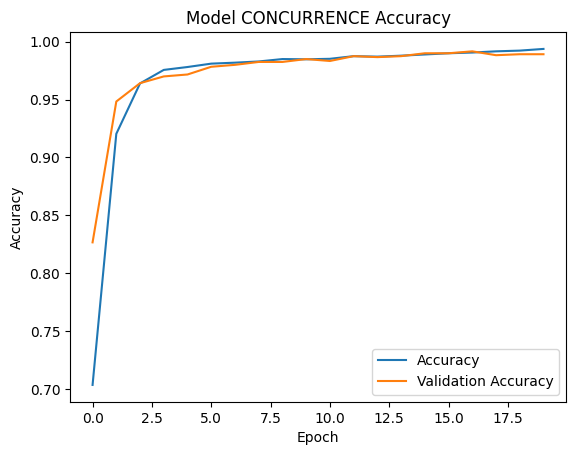

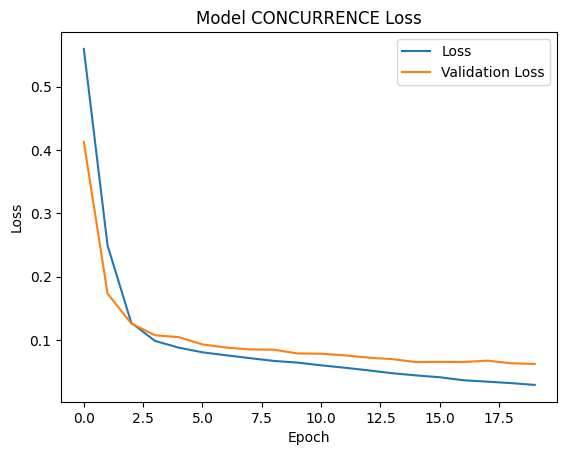

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:26 578ms/step - accuracy: 0.5625 - loss: 0.6945

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.6554 - loss: 0.6233  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6597 - loss: 0.6175 - val_accuracy: 0.8233 - val_loss: 0.4058


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.4250

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8828 - loss: 0.3253

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8862 - loss: 0.3176 - val_accuracy: 0.9567 - val_loss: 0.1443


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9375 - loss: 0.1519

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9557 - loss: 0.1328

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9574 - loss: 0.1286 - val_accuracy: 0.9775 - val_loss: 0.0775


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0689

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9791 - loss: 0.0745

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9790 - loss: 0.0741 - val_accuracy: 0.9917 - val_loss: 0.0582


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0718

142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9838 - loss: 0.0524

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.9917 - val_loss: 0.0382


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0186

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9883 - loss: 0.0377

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9933 - val_loss: 0.0337


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.0807

138/150 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9884 - loss: 0.0323

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9886 - loss: 0.0321 - val_accuracy: 0.9942 - val_loss: 0.0252


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0125

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9942 - loss: 0.0214

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9940 - loss: 0.0219 - val_accuracy: 0.9958 - val_loss: 0.0197


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0573

110/150 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9929 - loss: 0.0239

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9935 - loss: 0.0225 - val_accuracy: 0.9967 - val_loss: 0.0152


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0106

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9968 - loss: 0.0144

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9967 - loss: 0.0145 - val_accuracy: 0.9950 - val_loss: 0.0158


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0055

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9969 - loss: 0.0135

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9968 - loss: 0.0136 - val_accuracy: 0.9950 - val_loss: 0.0135


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0018

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9972 - loss: 0.0105

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9972 - loss: 0.0106 - val_accuracy: 0.9975 - val_loss: 0.0116


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0046

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9967 - loss: 0.0107

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9967 - val_loss: 0.0094


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0023

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.9975 - loss: 0.0084

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9975 - loss: 0.0083 - val_accuracy: 0.9975 - val_loss: 0.0092


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0106

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9993 - loss: 0.0065

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9991 - loss: 0.0066 - val_accuracy: 0.9975 - val_loss: 0.0079


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0040

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9992 - loss: 0.0045

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9975 - val_loss: 0.0074


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0026

115/150 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9997 - loss: 0.0046

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9995 - loss: 0.0047 - val_accuracy: 0.9975 - val_loss: 0.0092


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 7.5317e-04

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9994 - loss: 0.0046   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9994 - loss: 0.0046 - val_accuracy: 0.9975 - val_loss: 0.0081


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0068

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9994 - loss: 0.0038

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9983 - val_loss: 0.0046


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0072

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9995 - loss: 0.0037

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9983 - val_loss: 0.0064


2024/05/22 18:30:38 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0022

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9989 - loss: 0.0055


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/22 18:30:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 2


Model saved in run 89354b62e98847ee89b8976fba589b31


Created version '2' of model 'QuantumStateClassifier-ENTROPY'.


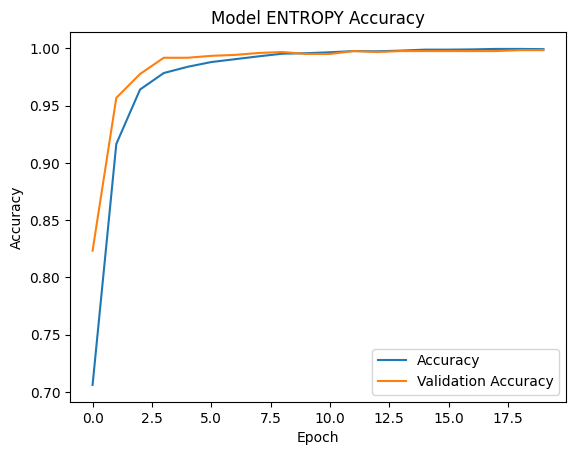

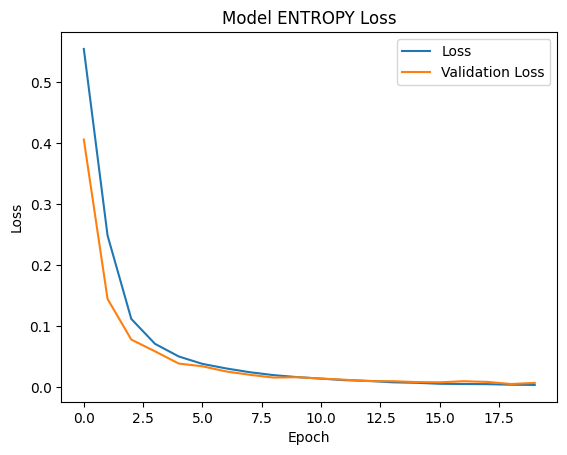

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:25 573ms/step - accuracy: 0.4375 - loss: 0.6967

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6484 - loss: 0.6197  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6569 - loss: 0.6097 - val_accuracy: 0.8283 - val_loss: 0.3802


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7500 - loss: 0.4796

146/150 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8918 - loss: 0.3037

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8928 - loss: 0.3014 - val_accuracy: 0.9383 - val_loss: 0.1482


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1399

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9610 - loss: 0.1267

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9615 - loss: 0.1247 - val_accuracy: 0.9683 - val_loss: 0.0783


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1061

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9768 - loss: 0.0757

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9774 - loss: 0.0739 - val_accuracy: 0.9808 - val_loss: 0.0498


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0721

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9794 - loss: 0.0583

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9803 - loss: 0.0563 - val_accuracy: 0.9850 - val_loss: 0.0372


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0706

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9891 - loss: 0.0379

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9908 - val_loss: 0.0288


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0096

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9934 - loss: 0.0265

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9933 - loss: 0.0265 - val_accuracy: 0.9967 - val_loss: 0.0211


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0213

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9940 - loss: 0.0198

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9958 - val_loss: 0.0172


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0316

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9929 - loss: 0.0205

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9932 - loss: 0.0202 - val_accuracy: 0.9950 - val_loss: 0.0149


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0039

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9965 - loss: 0.0135

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9964 - loss: 0.0136 - val_accuracy: 0.9967 - val_loss: 0.0119


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0119

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9959 - loss: 0.0134

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9967 - val_loss: 0.0105


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0023

 94/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9964 - loss: 0.0119

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9975 - val_loss: 0.0088


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0027

102/150 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9986 - loss: 0.0055

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9975 - val_loss: 0.0065


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0024

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9974 - loss: 0.0064

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9974 - loss: 0.0065 - val_accuracy: 0.9975 - val_loss: 0.0076


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0053

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9981 - loss: 0.0060

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9975 - val_loss: 0.0067


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0011

114/150 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.9983 - loss: 0.0049

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.9975 - val_loss: 0.0062


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0016

146/150 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9991 - loss: 0.0036

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9983 - val_loss: 0.0064


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0020

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9993 - loss: 0.0042

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0044


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0018

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9998 - loss: 0.0027

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0038


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0252

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9980 - loss: 0.0039

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9982 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0034


2024/05/22 18:30:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 7.2625e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9993 - loss: 0.0044   


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/22 18:30:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 2


Model saved in run 13bd80f084d14fc8982b3fb15e9fd408


Created version '2' of model 'QuantumStateClassifier-NEGATIVITY'.


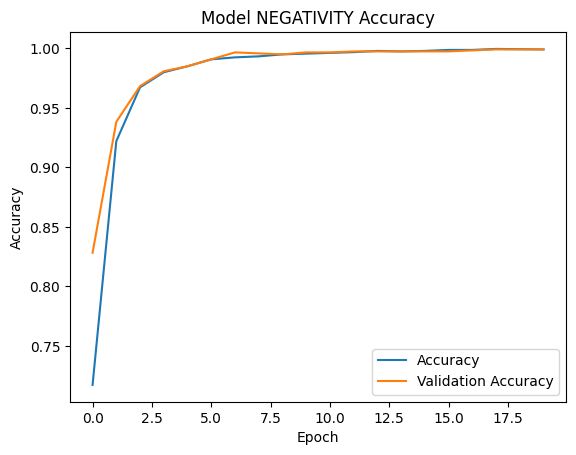

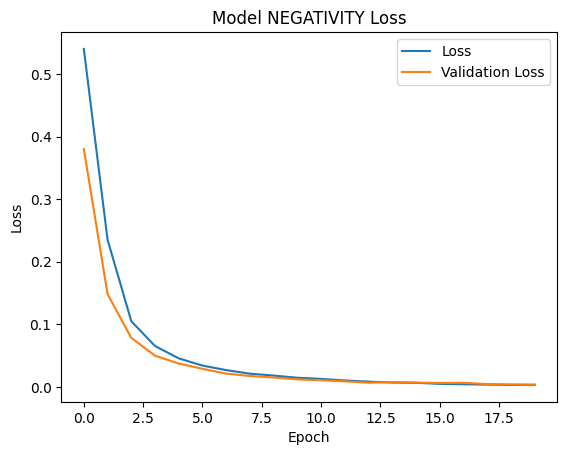

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:28 592ms/step - accuracy: 0.3125 - loss: 0.7073

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7215 - loss: 0.5839  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7258 - loss: 0.5715 - val_accuracy: 0.7658 - val_loss: 0.4653


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.3759

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7919 - loss: 0.4205

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7961 - loss: 0.4165 - val_accuracy: 0.8558 - val_loss: 0.3514


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.2818

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8776 - loss: 0.3035

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8772 - loss: 0.3030 - val_accuracy: 0.8800 - val_loss: 0.2685


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8125 - loss: 0.4007

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8969 - loss: 0.2569

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8982 - loss: 0.2542 - val_accuracy: 0.9150 - val_loss: 0.2132


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1562

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9310 - loss: 0.1944

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9323 - loss: 0.1923 - val_accuracy: 0.9492 - val_loss: 0.1648


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.1210

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.9550 - loss: 0.1512

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9544 - loss: 0.1503 - val_accuracy: 0.9467 - val_loss: 0.1378


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1152

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9715 - loss: 0.1119

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9708 - loss: 0.1127 - val_accuracy: 0.9542 - val_loss: 0.1227


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0893

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9723 - loss: 0.0989

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9719 - loss: 0.0988 - val_accuracy: 0.9750 - val_loss: 0.1001


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0506

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9798 - loss: 0.0845

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9794 - loss: 0.0846 - val_accuracy: 0.9700 - val_loss: 0.0938


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0507

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9830 - loss: 0.0749

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9827 - loss: 0.0752 - val_accuracy: 0.9658 - val_loss: 0.0887


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0572

100/150 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9835 - loss: 0.0692

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9818 - loss: 0.0707 - val_accuracy: 0.9692 - val_loss: 0.0810


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0598

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9788 - loss: 0.0712

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9787 - loss: 0.0706 - val_accuracy: 0.9583 - val_loss: 0.0935


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0729

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9761 - loss: 0.0713

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9774 - loss: 0.0696 - val_accuracy: 0.9758 - val_loss: 0.0734


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0453

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9782 - loss: 0.0632

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9789 - loss: 0.0622 - val_accuracy: 0.9767 - val_loss: 0.0677


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0834

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9817 - loss: 0.0596

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.9823 - loss: 0.0588 - val_accuracy: 0.9750 - val_loss: 0.0666


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.1296

116/150 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.9836 - loss: 0.0547

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9840 - loss: 0.0541 - val_accuracy: 0.9825 - val_loss: 0.0566


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0278

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9815 - loss: 0.0522

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9812 - loss: 0.0529 - val_accuracy: 0.9842 - val_loss: 0.0567


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0518

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9808 - loss: 0.0493

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9809 - loss: 0.0496 - val_accuracy: 0.9692 - val_loss: 0.0755


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0500

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9813 - loss: 0.0511

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9814 - loss: 0.0509 - val_accuracy: 0.9783 - val_loss: 0.0549


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0644

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9864 - loss: 0.0434

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9875 - val_loss: 0.0472


2024/05/22 18:30:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


2024/05/22 18:30:48 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpyv5toi0d/model, flavor: tensorflow). Fall back to return ['tensorflow==2.16.1', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0502

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9852 - loss: 0.0525


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/22 18:30:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 2


Model saved in run e56924b18a4f44618346f920e68ae072


Created version '2' of model 'QuantumStateClassifier-CHSH'.


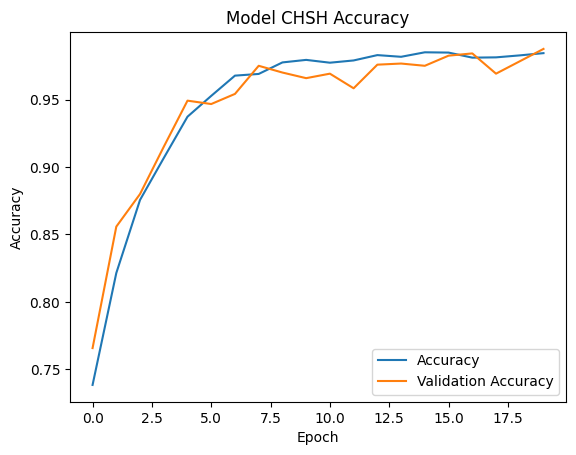

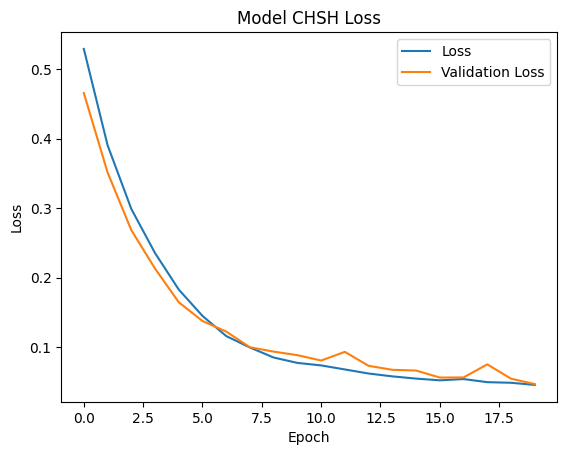

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
